2/2 [==============================] - 0s 136ms/step
Epoch 0/300 [D loss: 0.6816519796848297 | D accuracy: 68.75]


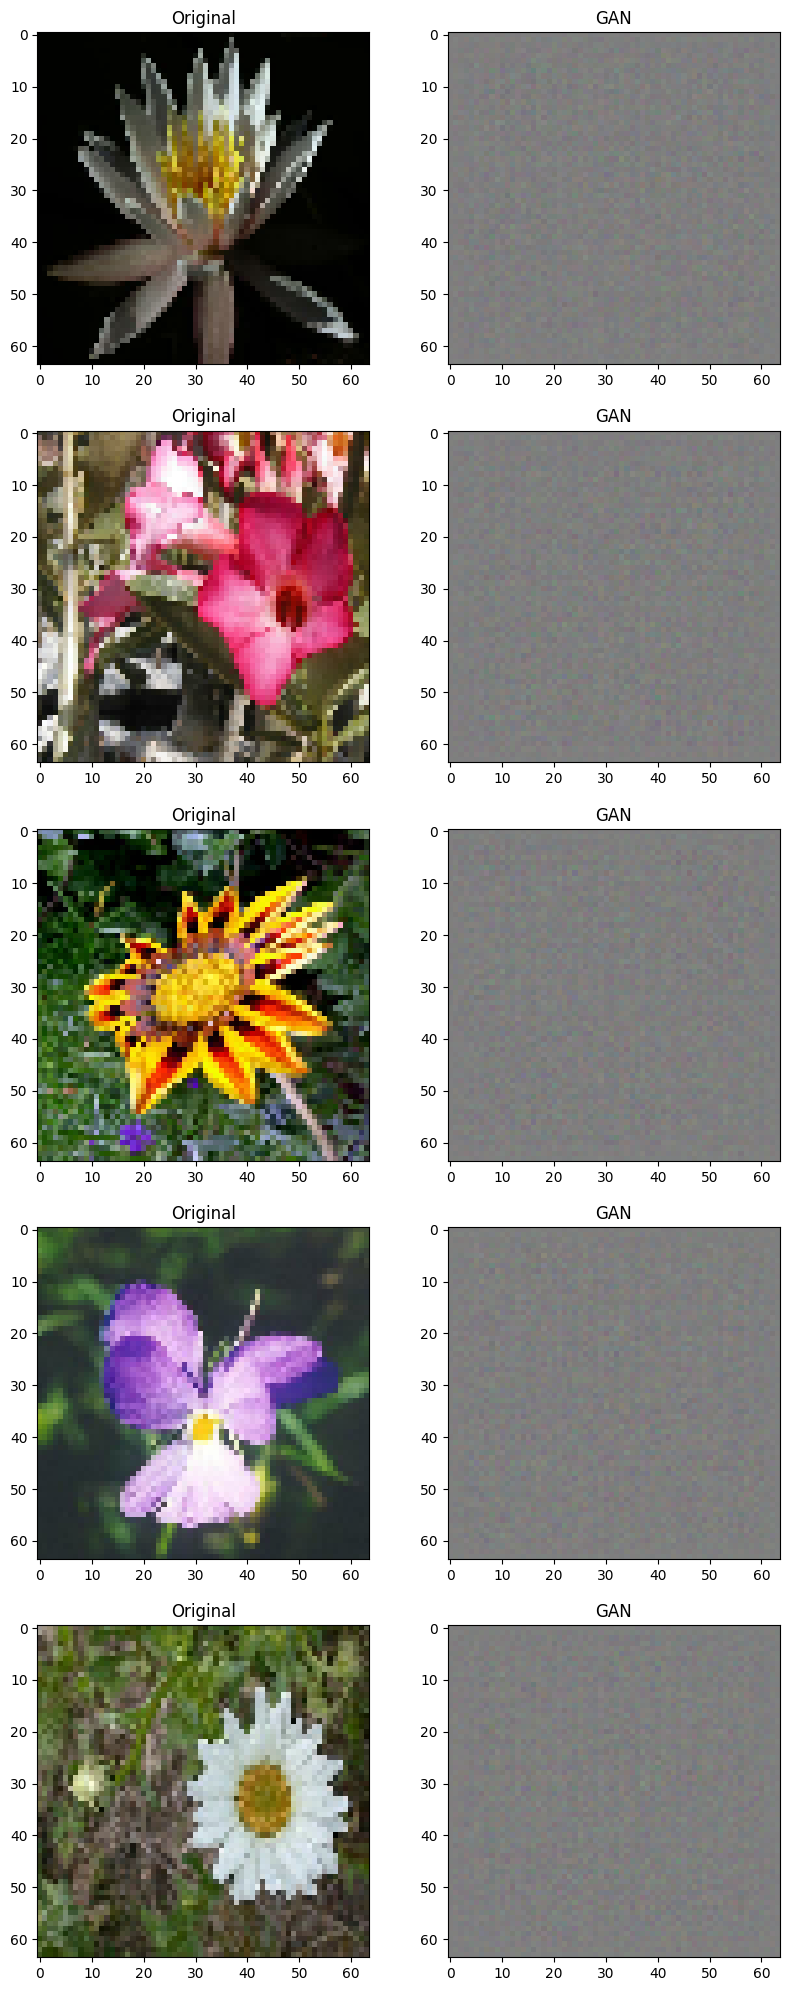

2/2 [==============================] - 0s 103ms/step
Epoch 10/300 [D loss: 0.20739653939381242 | D accuracy: 100.0]
2/2 [==============================] - 0s 175ms/step
Epoch 20/300 [D loss: 0.01595009141601622 | D accuracy: 100.0]
2/2 [==============================] - 0s 179ms/step
Epoch 30/300 [D loss: 0.004151461267611012 | D accuracy: 100.0]
2/2 [==============================] - 0s 108ms/step
Epoch 40/300 [D loss: 0.0018961986643262208 | D accuracy: 100.0]
2/2 [==============================] - 0s 106ms/step
Epoch 50/300 [D loss: 0.001127061237639282 | D accuracy: 100.0]


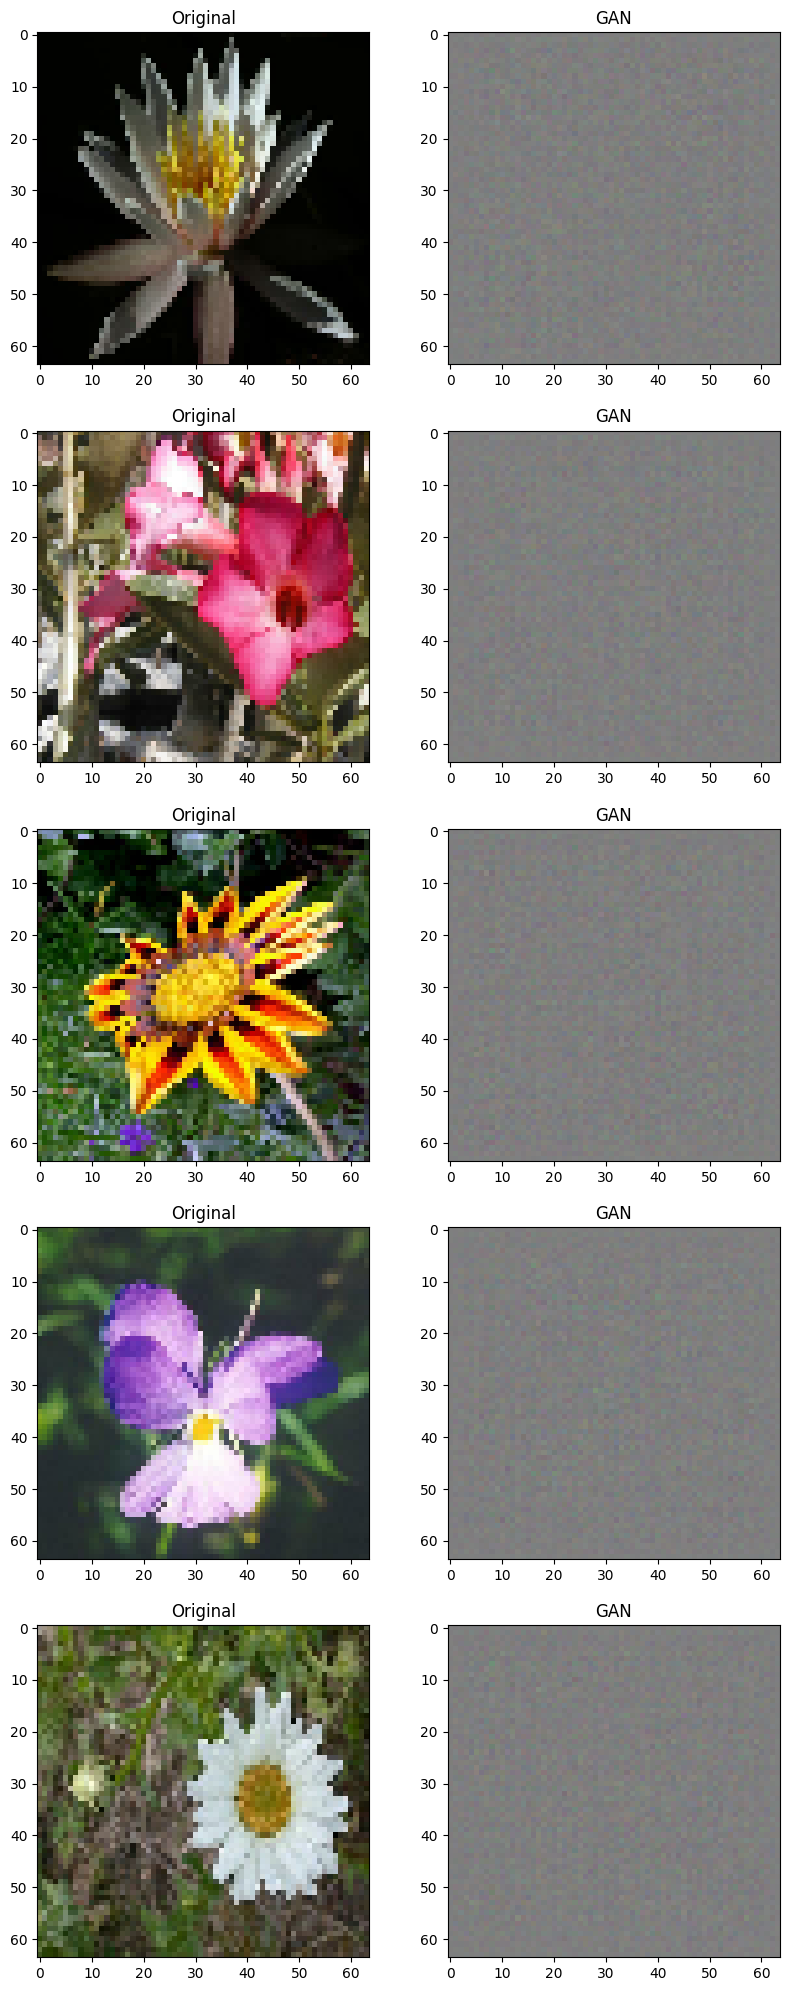

2/2 [==============================] - 0s 107ms/step
Epoch 60/300 [D loss: 0.0007370026942226104 | D accuracy: 100.0]
2/2 [==============================] - 0s 108ms/step
Epoch 70/300 [D loss: 0.0005302309655235149 | D accuracy: 100.0]
2/2 [==============================] - 0s 108ms/step
Epoch 80/300 [D loss: 0.0004012022036476992 | D accuracy: 100.0]
2/2 [==============================] - 0s 111ms/step
Epoch 90/300 [D loss: 0.0003114113351330161 | D accuracy: 100.0]
2/2 [==============================] - 0s 112ms/step
Epoch 100/300 [D loss: 0.0002512916944397148 | D accuracy: 100.0]


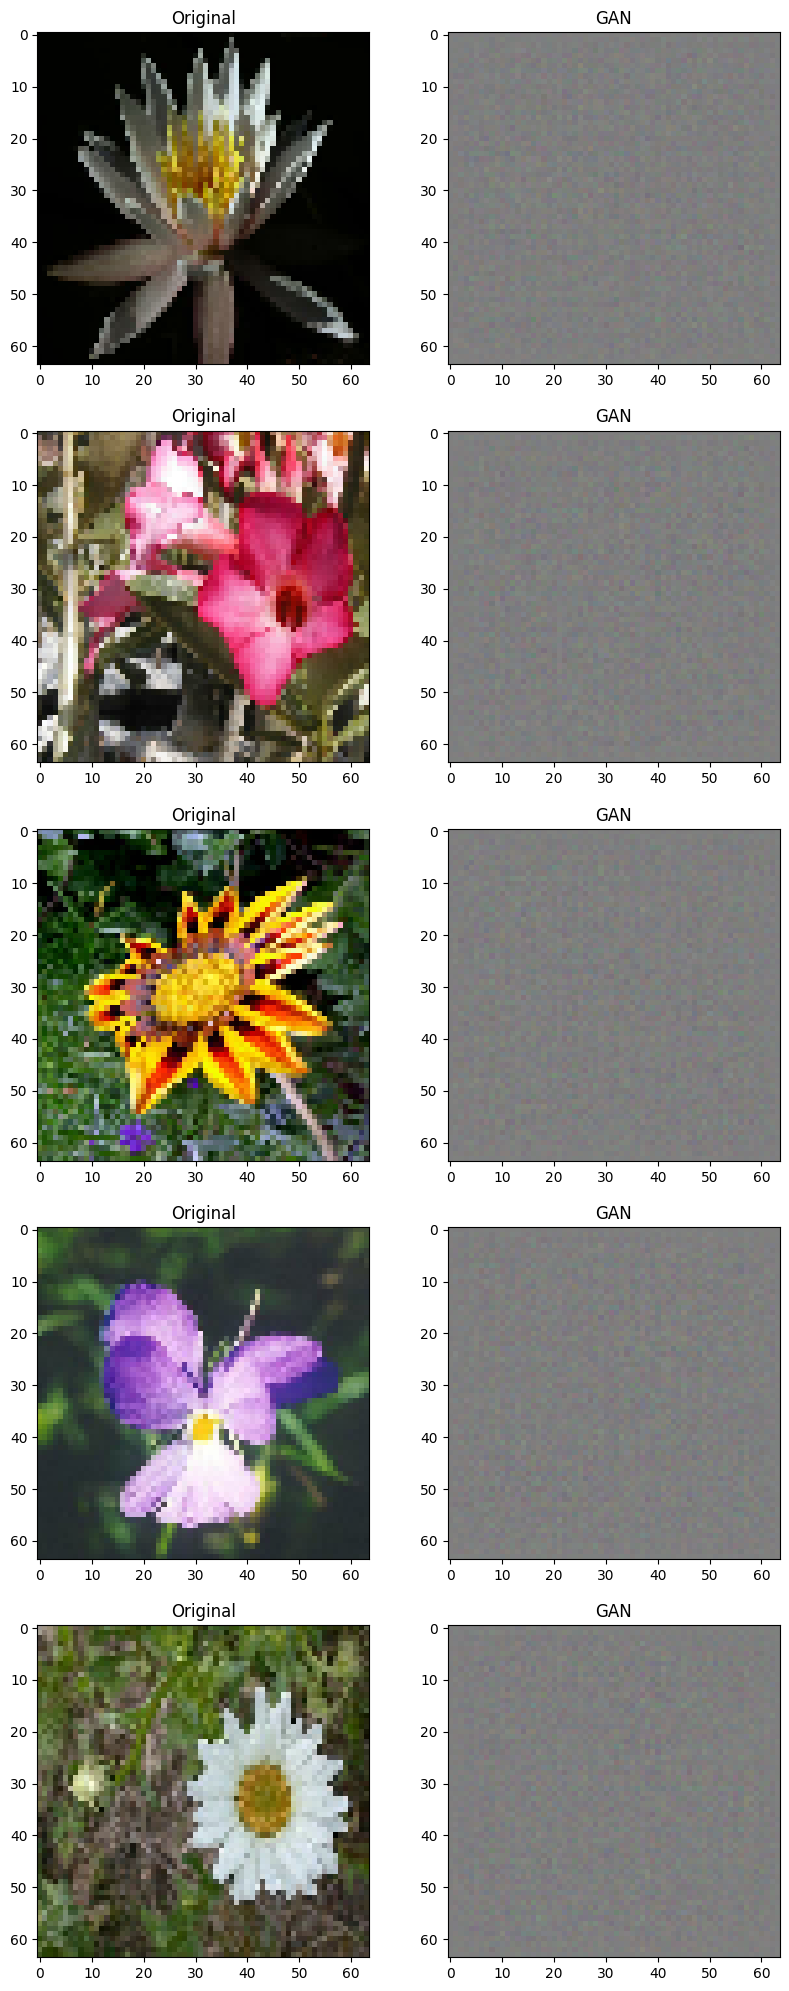

2/2 [==============================] - 0s 107ms/step
Epoch 110/300 [D loss: 0.00020892906104563735 | D accuracy: 100.0]
2/2 [==============================] - 0s 112ms/step
Epoch 120/300 [D loss: 0.0001740480092848884 | D accuracy: 100.0]
2/2 [==============================] - 0s 114ms/step
Epoch 130/300 [D loss: 0.00015118343981157523 | D accuracy: 100.0]
2/2 [==============================] - 0s 110ms/step
Epoch 140/300 [D loss: 0.00013059833327133674 | D accuracy: 100.0]
2/2 [==============================] - 0s 104ms/step
Epoch 150/300 [D loss: 0.00011266998535575112 | D accuracy: 100.0]


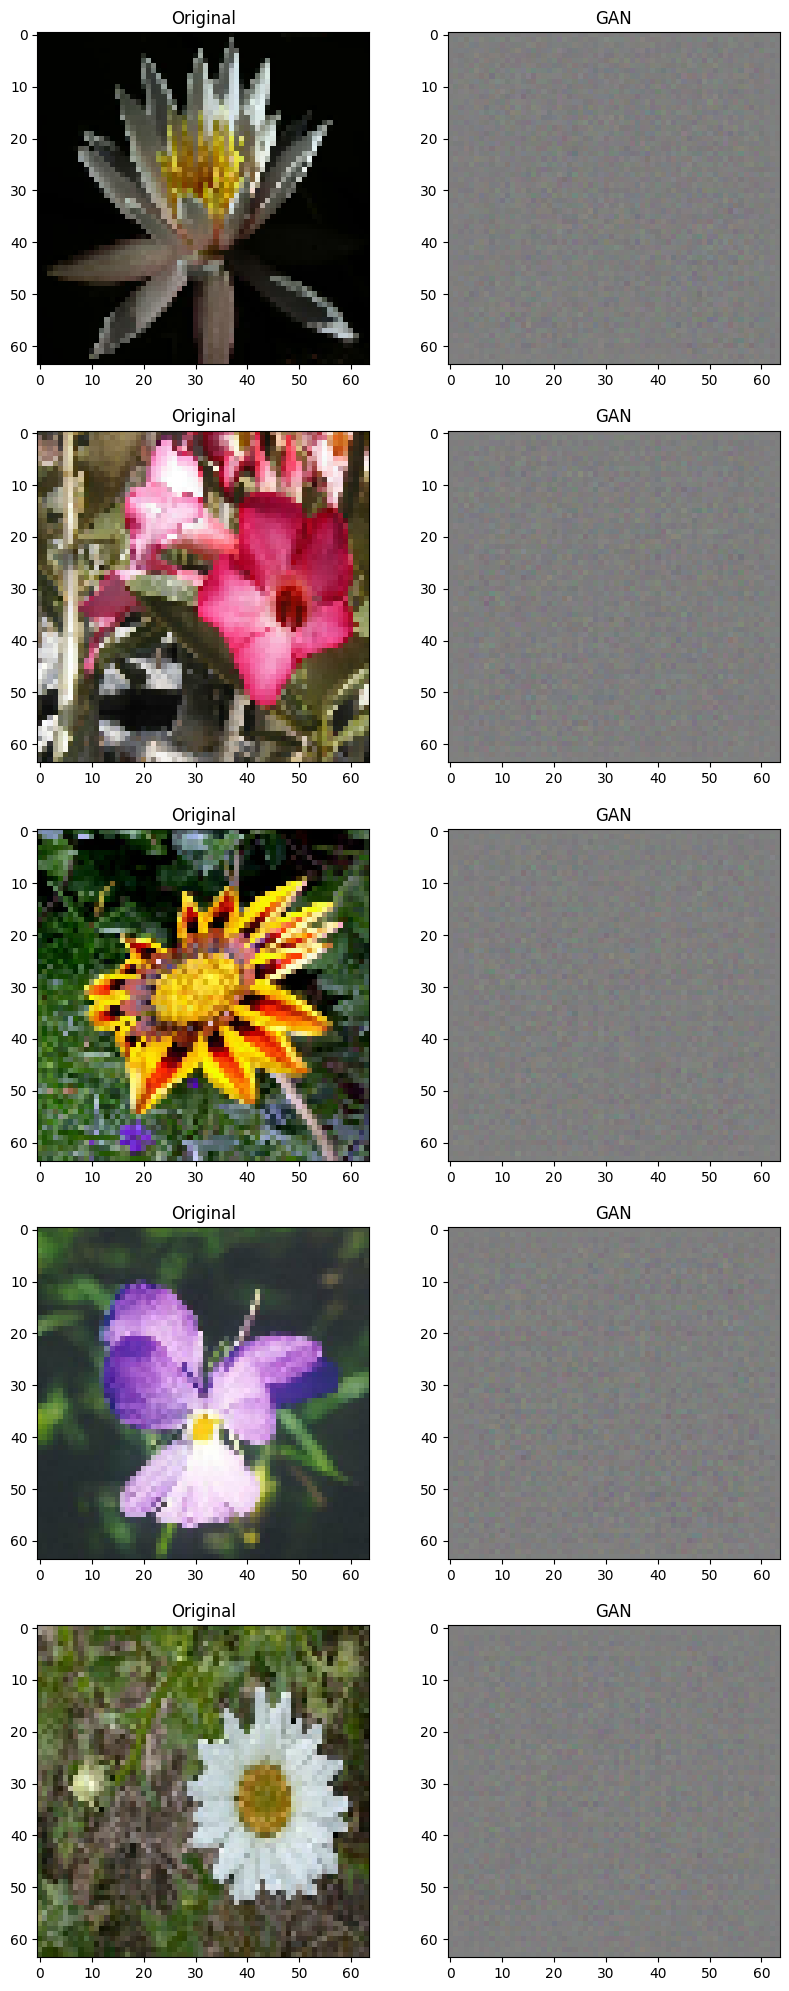

2/2 [==============================] - 0s 120ms/step
Epoch 160/300 [D loss: 0.00010039377048087772 | D accuracy: 100.0]
2/2 [==============================] - 0s 115ms/step
Epoch 170/300 [D loss: 8.839252950565424e-05 | D accuracy: 100.0]
2/2 [==============================] - 0s 105ms/step
Epoch 180/300 [D loss: 7.944621302158339e-05 | D accuracy: 100.0]
2/2 [==============================] - 0s 113ms/step
Epoch 190/300 [D loss: 7.14416737537249e-05 | D accuracy: 100.0]
2/2 [==============================] - 0s 109ms/step
Epoch 200/300 [D loss: 6.363946977216983e-05 | D accuracy: 100.0]


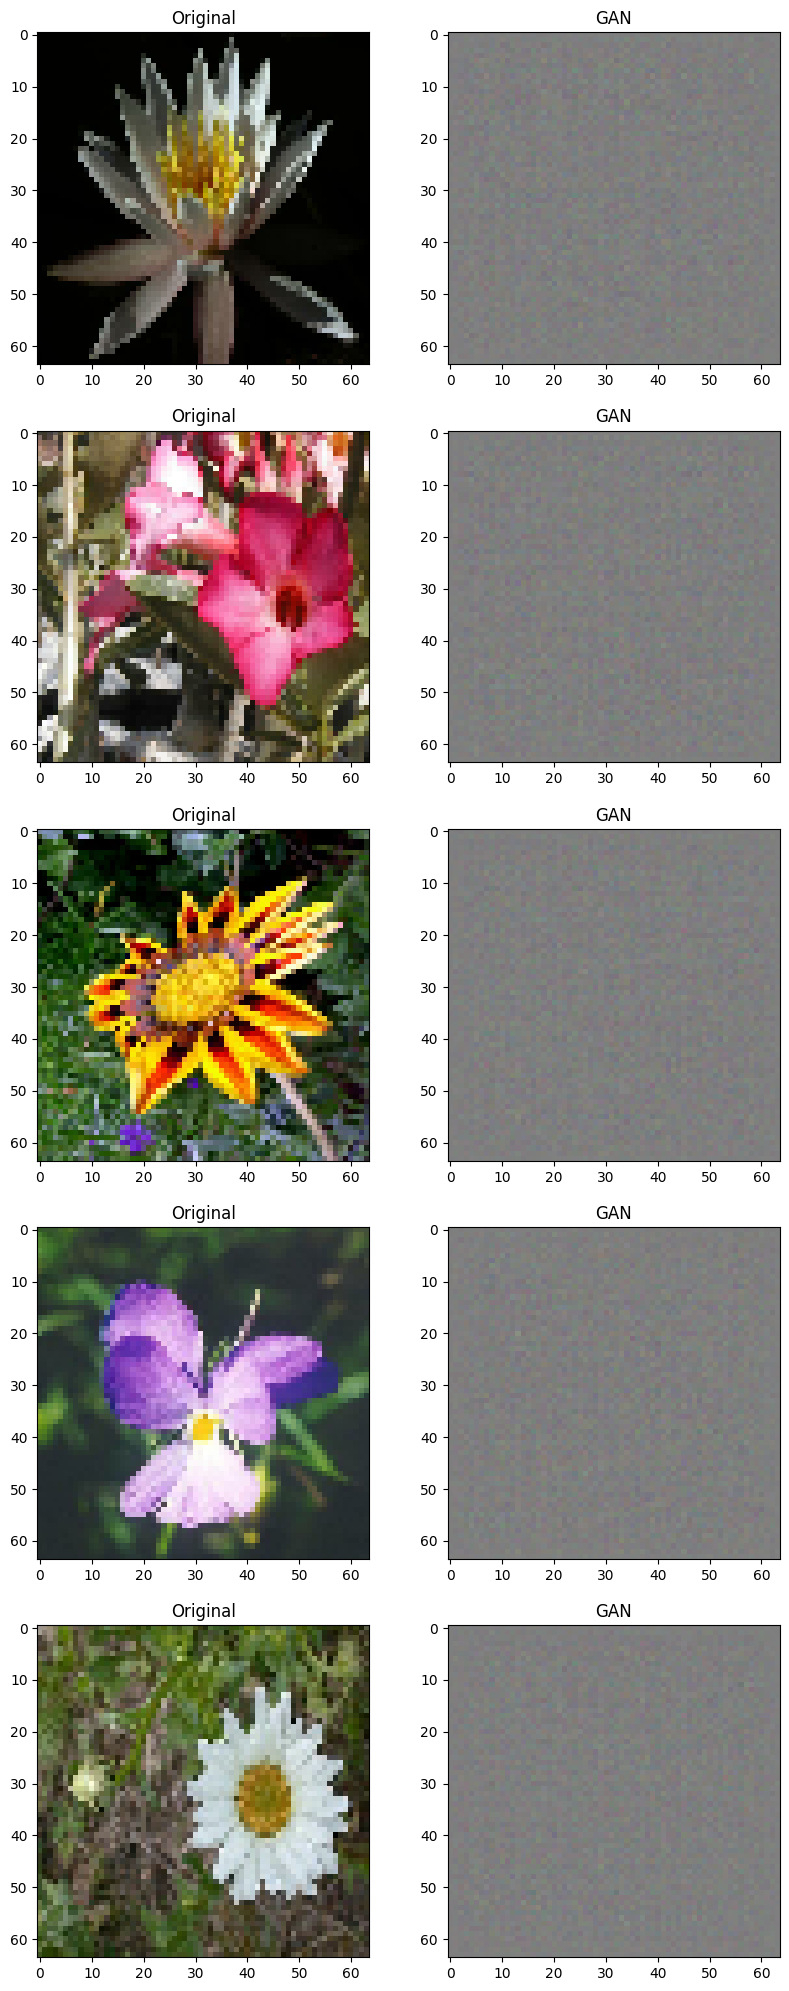

2/2 [==============================] - 0s 114ms/step
Epoch 210/300 [D loss: 5.885061818844406e-05 | D accuracy: 100.0]
2/2 [==============================] - 0s 113ms/step
Epoch 220/300 [D loss: 5.394694926508237e-05 | D accuracy: 100.0]
2/2 [==============================] - 0s 115ms/step
Epoch 230/300 [D loss: 4.887813793175155e-05 | D accuracy: 100.0]
2/2 [==============================] - 0s 114ms/step
Epoch 240/300 [D loss: 4.456054330148618e-05 | D accuracy: 100.0]
2/2 [==============================] - 0s 112ms/step
Epoch 250/300 [D loss: 4.090746415386093e-05 | D accuracy: 100.0]


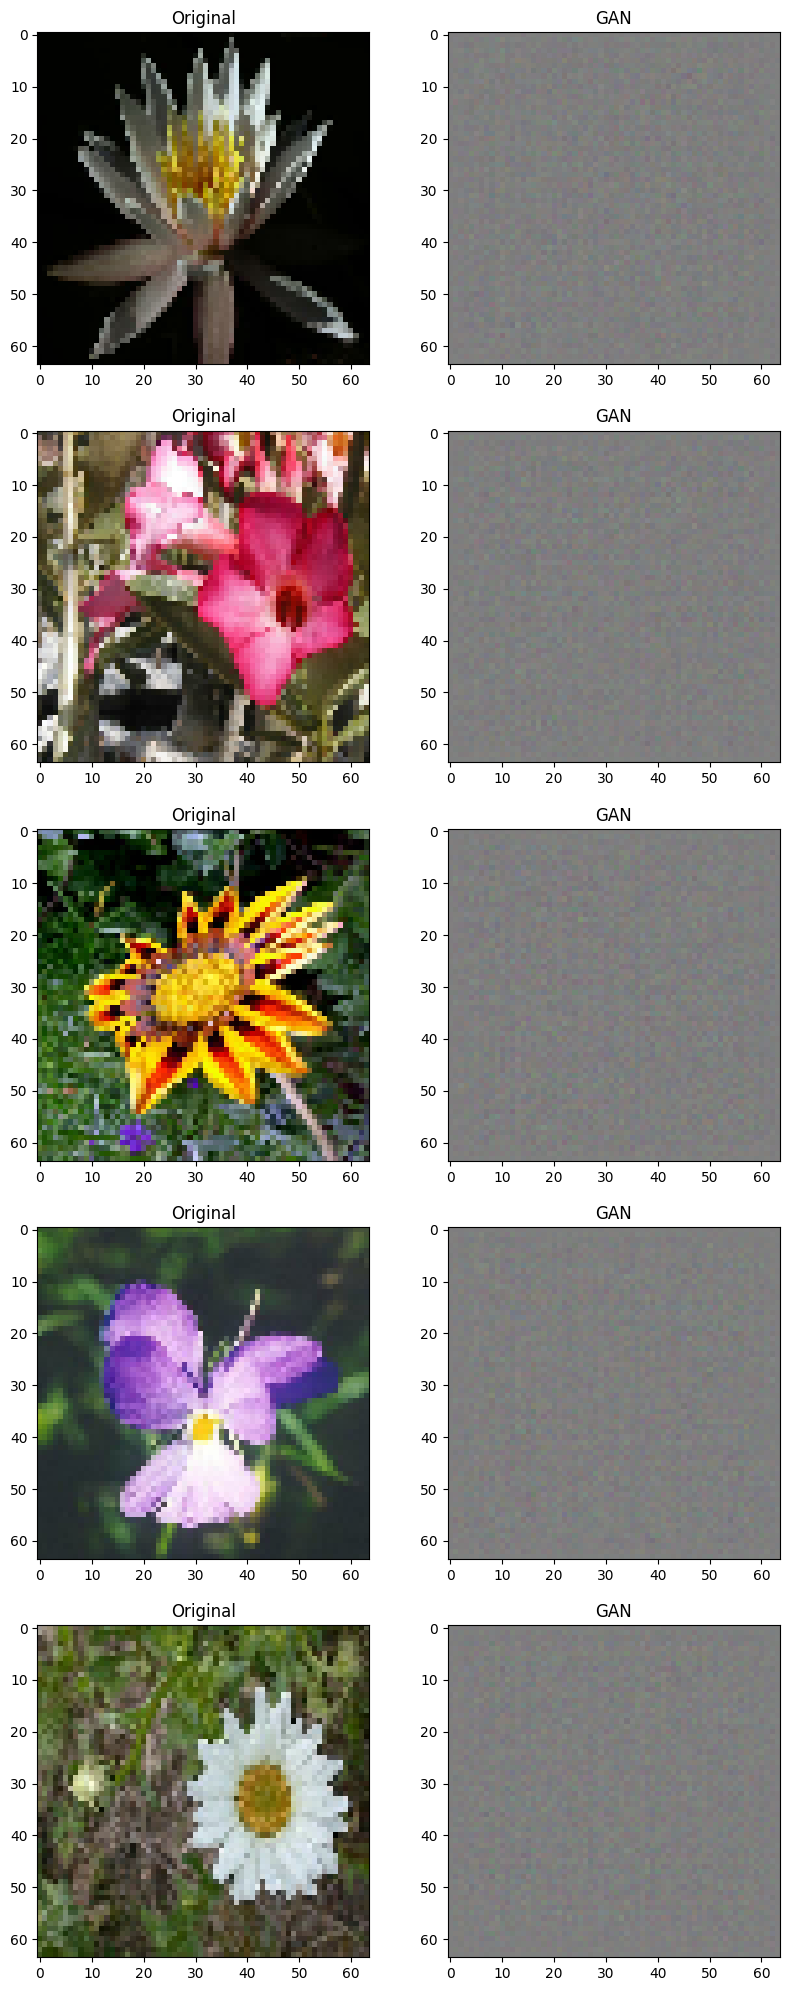

2/2 [==============================] - 0s 126ms/step
Epoch 260/300 [D loss: 3.844832326649339e-05 | D accuracy: 100.0]
2/2 [==============================] - 0s 110ms/step
Epoch 270/300 [D loss: 3.5527542422642e-05 | D accuracy: 100.0]
2/2 [==============================] - 0s 144ms/step
Epoch 280/300 [D loss: 3.313658271508757e-05 | D accuracy: 100.0]
2/2 [==============================] - 0s 177ms/step
Epoch 290/300 [D loss: 3.069971535296645e-05 | D accuracy: 100.0]
1/1 [==============================] - 0s 176ms/step


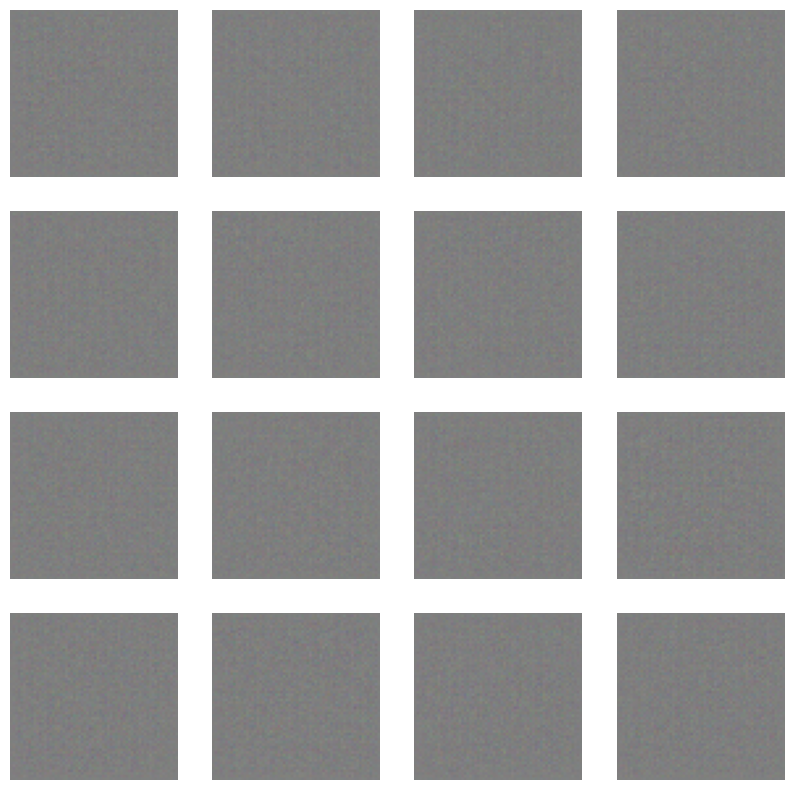

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
tf.compat.v1.enable_eager_execution()
def build_generator(latent_dim):
    model = models.Sequential()
    model.add(layers.Dense(8 * 8 * 128, input_dim=latent_dim))
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((8, 8, 128)))
    model.add(layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(3, kernel_size=4, strides=2, padding='same', activation='tanh'))
    return model
def build_discriminator(img_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(64, kernel_size=4, strides=2, padding='same', input_shape=img_shape))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2D(128, kernel_size=4, strides=2, padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))
    return model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model
train_ds, info = tfds.load('oxford_flowers102', split='train', with_info=True, as_supervised=True)
img_shape = (64, 64, 3)
def preprocess_image(image, label):
    image = tf.image.resize(image, (img_shape[0], img_shape[1]))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label
train_ds = train_ds.map(preprocess_image)
latent_dim = 1000
generator = build_generator(latent_dim)
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])
discriminator.trainable = False
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5))
batch_size = 64
epochs = 300
for epoch in range(epochs):
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    generated_images = generator.predict(noise)
    real_images, _ = next(iter(train_ds.take(batch_size)))
    real_images = np.concatenate([real_images.numpy() for _ in range(batch_size)])
    real_labels = np.ones((batch_size, 1))
    real_images = np.reshape(real_images, (-1,) + img_shape)
    d_loss_real = discriminator.train_on_batch(real_images, real_labels)
    d_loss_fake = discriminator.train_on_batch(generated_images, np.zeros((batch_size, 1)))
    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs} [D loss: {0.5 * np.add(d_loss_real, d_loss_fake)[0]} | D accuracy: {100 * 0.5 * np.add(d_loss_real, d_loss_fake)[1]}]")
    if epoch % 50 == 0:
        num_display = 5
        plt.figure(figsize=(15, 5 * num_display))
        for i, (image, label) in enumerate(train_ds.take(num_display)):
            plt.subplot(num_display, 3, i * 3 + 1)
            plt.imshow(image.numpy())
            plt.title(f'Original')
            plt.subplot(num_display, 3, i * 3 + 2)
            gen_img = (generated_images[i] + 1) / 2
            plt.imshow(gen_img)
            plt.title(f'GAN')
        plt.show()
noise = np.random.normal(0, 1, (16, latent_dim))
generated_images = generator.predict(noise)
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow((generated_images[i] + 1) / 2)
    plt.axis('off')
plt.show()

#Here there was a further attempt to generate images using GAN, however as it can be observed this was not the case due to the fact that it is still generating Grey images and even the clean images are not showing the true labels.
